In [74]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Lessons learned
* Make notes on classic EDA stuff
 * grouping and aggregating
 * summary statistics
 * basic plots
 * correlations

How to improve the data
* good column names from the start
* no unnecessary whitespace
* sensible group names

In [130]:
log = pd.read_csv('log.csv', sep=',')

### Accept + move type statistics

In [131]:
log['accept'].value_counts()

0.0    986456
1.0      5431
Name: accept, dtype: int64

In [132]:
log['type'].value_counts()

B    333662
M    333250
D    333088
Name: type, dtype: int64

In [133]:
log.groupby('accept')['type'].value_counts()

accept  type
0.0     D       332714
        M       328325
        B       325417
1.0     M         4866
        D          374
        B          191
Name: type, dtype: int64

In [134]:
log[(log['type'] == 'B') & (log['accept'] == 1)]

,step_no,type,pt,pt_mv,energy,energy_after,b,ratio,accept,no_vrt,no_act_vrt,time
174,175,B,0.452838 0.357842 0.748872 0.00769639,,136.555,136.686,0.000918,0.001370,1.0,6000.0,728.0,0.001013
1627,1628,B,0.860096 0.998667 0.732157 0.00625124,,137.095,137.187,0.000415,0.001376,1.0,5997.0,725.0,0.000829
4555,4556,B,0.981736 0.327515 0.942598 0.00136058,,135.528,135.631,0.000362,0.001429,1.0,5970.0,698.0,0.000758
6013,6014,B,0.340159 0.975919 0.773364 0.00660294,,135.064,135.181,0.000137,0.001443,1.0,5963.0,691.0,0.000884
24329,24330,B,0.623441 0.852032 0.902419 0.00570425,,132.140,132.233,0.001080,0.001532,1.0,5923.0,651.0,0.000884
24794,24795,B,0.146831 0.106356 0.623802 0.00584342,,132.236,132.323,0.000559,0.001530,1.0,5924.0,652.0,0.000812
33738,33739,B,0.0487166 0.930947 0.470683 0.00491679,,133.495,133.473,0.000205,0.001553,1.0,5915.0,643.0,0.000770
43517,43518,B,0.221257 0.59129 0.910814 0.00558199,,132.407,132.483,0.001245,0.001564,1.0,5910.0,638.0,0.000765
64915,64916,B,0.853827 0.992892 0.258744 0.00513719,,131.562,131.504,0.000743,0.001614,1.0,5891.0,619.0,0.000915
68861,68862,B,0.266146 0.0344125 0.0574266 0.00558344,,131.998,131.921,0.000706,0.001617,1.0,5890.0,618.0,0.000983


In [40]:
log[(log['type'] == 'D') & (log['accept'] == 1)]

,no,type,pt,pt_mv,energy,energy_after,b,ratio,accept,no_vrt,no_act_vrt,time
89,90,D,0.944444 0.722222 0.833333 0.005,,136.242,136.187,0.317695,729.400,Proposal accepted,5999.0,729.0,0.002456;
516,517,D,0.166667 0.388889 0.722222 0.005,,136.576,136.482,0.017082,728.681,Proposal accepted,5998.0,728.0,0.002667;
963,964,D,0.5 0.166667 0.833333 0.005,,137.342,137.265,0.447364,728.563,Proposal accepted,5998.0,728.0,0.002181;
983,984,D,0.277778 0.722222 0.277778 0.005,,137.310,137.256,0.183040,727.391,Proposal accepted,5997.0,727.0,0.001866;


### Convergence

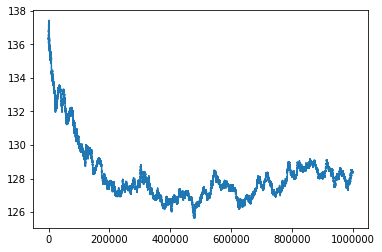

In [135]:
log['energy'].plot()

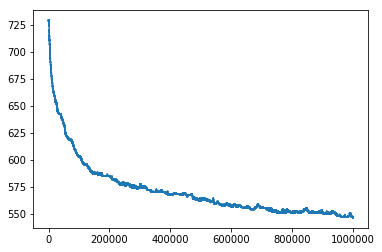

In [136]:
log['no_act_vrt'].plot()

In [89]:
log['time'] = log['time'].replace(math.nan,'',regex=True)
log['time'] = pd.to_numeric(log['time'].apply(lambda s: s[1:-1]))

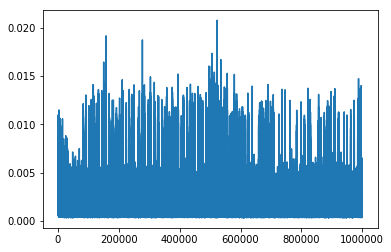

In [137]:
log['time'].plot()

In [156]:
block_length = 10000
groupby_blocks = np.repeat(range(int(len(log)/block_length)),block_length)

In [157]:
groupedlog = log.groupby([groupby_blocks, 'type'])['accept'].sum().reset_index()

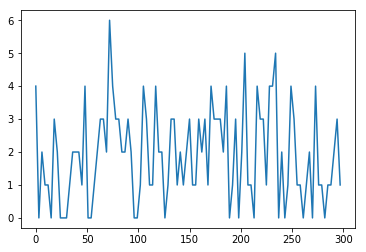

In [158]:
groupedlog[groupedlog['type'] == 'B']['accept'].plot()

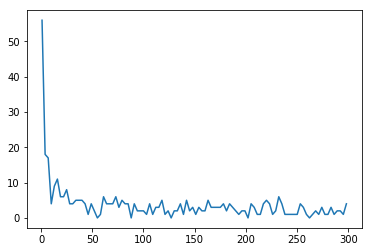

In [159]:
groupedlog[groupedlog['type'] == 'D']['accept'].plot()

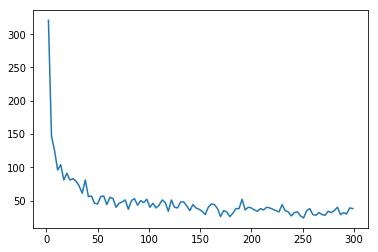

In [160]:
groupedlog[groupedlog['type'] == 'M']['accept'].plot()